## Importing Packages and Set Up

In [12]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal
from pylab import *
import numpy as np
from scipy import interpolate

import astropy.units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, EarthLocation, Angle
from astropy.coordinates import FK5

import detectorgeometry_trap as geom

## Importing Flight Data

In [4]:
import csv
with open("flight_paths/gpsInfo_ANITA3.csv", 'rb') as csvfile:
    flight_path = csv.reader(csvfile)

# Columns:
    # 0 - Interval Time (Unix Time)
    # 1 - Run
    # 2 - Real Time (Unix Time)
    # 3 - Latitude
    # 4 - Longitude
    # 5 - Altitude
    # 6 - Heading

    flight_path_3=[]
    for row in flight_path:
        flight_path_3.append(row)
    
flight_path_3=np.asarray(flight_path_3,dtype=float64)
days_3 = Time(flight_path_3[:,2],format='unix') - Time(min(flight_path_3[:,2]),format='unix')
days_3 = days_3.value

In [13]:
with open('flight_paths/anita1pos.dat', 'rb') as flight_path:
# Columns:
    # 0 - Unix Time
    # 1 - Latitude
    # 2 - Longitude
    # 3 - Altitude
    
    flight_path.readline()
    seen = set()

    time_1=[]
    lat_1=[]
    lon_1=[]
    alt_1=[]

    flight_path_1=[]
    for line in flight_path:
        if line in seen: continue 
        seen.add(line)
        line = line.split()
        time_1.append(float(line[0]))
        lat_1.append(float(line[1]))
        lon_1.append(float(line[2]))
        alt_1.append(float(line[3])/1000)

flight_path_1 = [time_1[:546245],lat_1[:546245],lon_1[:546245],alt_1[:546245]] 
days_1 = Time(flight_path_1[0],format='unix') - Time(min(flight_path_1[0]),format='unix')
days_1 = days_1.value


In [ ]:
with open('flight_paths/anita4pos.dat', 'rb') as flight_path:
# Columns:
    # 0 - Unix Time
    # 1 - Latitude
    # 2 - Longitude
    # 3 - Altitude
    
    flight_path.readline()
    
    time_4=[]
    lat_4=[]
    lon_4=[]
    alt_4=[]

    flight_path_4=[]
    for line in flight_path:
        line = line.split()
        time_4.append(float(line[0]))
        lat_4.append(float(line[1]))
        lon_4.append(float(line[2]))
        alt_4.append(float(line[3])/1000)

flight_path_4 = [time_4,lat_4,lon_4,alt_4]
days_4 = Time(flight_path_4[0],format='unix') - Time(min(flight_path_4[0]),format='unix')
days_4 = days_4.value

## Latitude, Longitude, Altitude Graphs

In [ ]:
# Latitude over time for each flight


fig = plt.figure()
ax = plt.axes()

ax.plot(days_1, flight_path_1[3])
# ax.plot(days_1_other-40, flight_path_1[3][546245:])
ax.plot(days_3, flight_path_3[:,5]/1000)
ax.plot(days_4, flight_path_4[3])

legend = ax.legend(["ANITA I","ANITA III","ANITA IV"], fontsize=14, bbox_to_anchor=(1, 1.05))

plt.xlabel("Days into Flight", fontsize=18)
plt.ylabel('Altitude (km)', fontsize=18)
plt.title("Altitude of ANITA Flights", fontsize=20)

# ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')

In [ ]:
# Latitude over time for each flight


fig = plt.figure()
ax = plt.axes()

ax.plot(days_1, flight_path_1[1])
ax.plot(days_3, flight_path_3[:,3])
ax.plot(days_4, flight_path_4[1])

legend = ax.legend(["ANITA I","ANITA III","ANITA IV"], fontsize=14, bbox_to_anchor=(1, 1.05))

plt.xlabel("Days into Flight", fontsize=18)
plt.ylabel('Latitude (degrees)', fontsize=18)
plt.title("Latitude of ANITA Flights", fontsize=20)

# ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')

In [ ]:
# Longitude over time for each flight


fig = plt.figure()
ax = plt.axes()
# start = 0 # 
# end = 90 # 
# steps=100 # 

ax.plot(days_1, flight_path_1[2][0:546245])
ax.plot(days_3, flight_path_3[:,4])
ax.plot(days_4, flight_path_4[2])
    
# plt.xlim(-90,0)  

legend = ax.legend(["ANITA I","ANITA III","ANITA IV"], fontsize=14, bbox_to_anchor=(1, 1.05))


plt.xlabel("Days into Flight", fontsize=18)
plt.ylabel('Longitude (degrees)', fontsize=18)
plt.title("Longitude of ANITA Flights", fontsize=20)

# ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.show()

## Flight Projection Maps

In [14]:
# Setup ANITA Flight Path Data

T_samp = Time('2013-12-11T00:00:00.0') - Time('2013-12-10T00:00:00.0')
T_samp.format = "sec"

A_lat = np.asarray([]) # Earth latitude in degrees
A_long = np.asarray([])# Earth longitude in degrees
A_alt = np.asarray([])
A_ice = np.asarray([])
A_time = np.asarray([])


In [15]:
# Select which Flight to Map
flight = 1

if flight ==1:
    orbit = Time(max(flight_path_1[0]),format="unix") - Time(min(flight_path_1[0]),format="unix")
    N_sim = orbit/T_samp
    N_sim = int(round(N_sim.value))
    for i in range(0,N_sim):
        A_time_inc = Time(min(flight_path_1[0]),format="unix")+i*T_samp
        A_time  = np.append(A_time, A_time_inc.value)
        A_ice = np.append(A_ice,3.0)
    
    A_lat = np.interp(A_time,flight_path_1[0],flight_path_1[1],0.0,0.0)
    A_long = np.interp(A_time,flight_path_1[0],flight_path_1[2],0.0,0.0)
    A_alt = np.interp(A_time,flight_path_1[0],flight_path_1[3],0.0,0.0)
    T_start = flight_path_1[0][0]

elif flight ==4:
    orbit = Time(max(flight_path_4[0]),format="unix") - Time(min(flight_path_4[0]),format="unix")
    N_sim = orbit/T_samp
    N_sim = int(round(N_sim.value))
    for i in range(0,N_sim):
        A_time_inc = Time(min(flight_path_4[0]),format="unix")+i*T_samp
        A_time  = np.append(A_time, A_time_inc.value)
        A_ice = np.append(A_ice,3.0)
    
    A_lat = np.interp(A_time,flight_path_4[0],flight_path_4[1],0.0,0.0)
    A_long = np.interp(A_time,flight_path_4[0],flight_path_4[2],0.0,0.0)
    A_alt = np.interp(A_time,flight_path_4[0],flight_path_4[3],0.0,0.0)
    T_start = flight_path_4[0][0]
    
elif flight == 3:
    orbit = Time(max(flight_path_3[:,2]),format="unix") - Time(min(flight_path_3[:,2]),format="unix")
    N_sim = orbit/T_samp
    N_sim = int(round(N_sim.value))
    for i in range(0,N_sim):
        A_time_inc = Time(min(flight_path_3[:,2]),format="unix")+i*T_samp
        A_time  = np.append(A_time, A_time_inc.value)
        A_ice = np.append(A_ice,3.0)
    
    A_lat = np.interp(A_time,flight_path_3[:,2],flight_path_3[:,3],0.0,0.0)
    A_long = np.interp(A_time,flight_path_3[:,2],flight_path_3[:,4],0.0,0.0)
    A_alt = np.interp(A_time,flight_path_3[:,2],flight_path_3[:,5]/1000,0.0,0.0)
    T_start = flight_path_3[0,2]
    

In [16]:
h = A_alt 
lat_loc = Angle(A_lat *u.deg)
lon_loc = Angle(A_long * u.deg)
A_loc = EarthLocation(lat = lat_loc,lon = lon_loc, height = h *u.km )

radius = lambda x: np.sqrt(A_loc.geocentric[0][x]**2+A_loc.geocentric[1][x]**2+A_loc.geocentric[2][x]**2)
A_R = radius(range(0,len(A_loc)))

In [17]:
# Map Creation Parameters
sky_bin_dec = np.linspace(-90,90,181)
sky_bins = np.tile(sky_bin_dec,(360,1))

In [19]:
# Importing Effective Areas for Various Source Angles
import csv
with open("geomtrap_effectivearea.csv", 'rb') as csvfile:
    areas_ref = csv.reader(csvfile)

    eff_areas=[]
    for row in areas_ref:
        eff_areas.append(row[0])
    
eff_areas=np.asarray(eff_areas,dtype=float64)

In [20]:
# determining effective area for each bin of the sky map
sky_maps_frames_sep=[]
sky_maps_frames_total=[]

sky_map_total = np.asarray([[0 for x in range(181)] for y in range(360)],dtype=float64)
for k in range(0,N_sim):
    print k
    sky_map_b = np.asarray([[0 for x in range(181)] for y in range(360)],dtype=float64 )
    
    # determine ANITA approximate position for that time bin
    A_time_bin = A_time[k]
    A_lat_bin = A_lat[k]
    A_lon_bin = A_long[k]
    A_alt_bin = A_alt[k]
    A_ice_bin = A_ice[k]
    A_R_bin = A_R[k]

    h_bin = A_alt_bin
    lat_loc_bin = Angle(A_lat_bin *u.deg)
    lon_loc_bin = Angle(A_lon_bin * u.deg)
    A_loc_bin = EarthLocation(lat = lat_loc_bin,lon = lon_loc_bin, height = h_bin *u.km )
            
    for i in range(0,360):
        # print i
        bin_ra = Angle(i * u.deg)
        bin_dec = Angle(sky_bins[i] * u.deg)
    
        # determine the altitude and azimuth of the sky map bin from ANITA's point of view
        sky_bin_loc = SkyCoord(ra = bin_ra, dec = bin_dec, frame = 'icrs', obstime = Time(A_time_bin,format="unix"), location = A_loc_bin)
        sky_bin_alt_az = sky_bin_loc.transform_to('altaz')
        sky_bin_alt = sky_bin_alt_az.alt

        # convert from sky bin altitude to source angle
        bin_elev = sky_bin_alt.value
        theta_src = 180+bin_elev - 90
        # print bin_dec,theta_src

        A = np.interp(theta_src,np.linspace(0,90,100),eff_areas,0.0,0.0)

        #sky_map_ra=np.asarray(A)
        # print i, len(theta_src),len(A),sky_map_ra.shape
        sky_map_b[i] = np.asarray(A,dtype=float64)
        #print min(A[90:]), min(sky_map_b[i][90:])
    
    
    sky_map_total = sky_map_total+sky_map_b
    sky_maps_frames_sep.append(sky_map_b)
    
    sky_map_mean = sky_map_total/float(k+1)
    sky_maps_frames_total.append(sky_map_mean)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


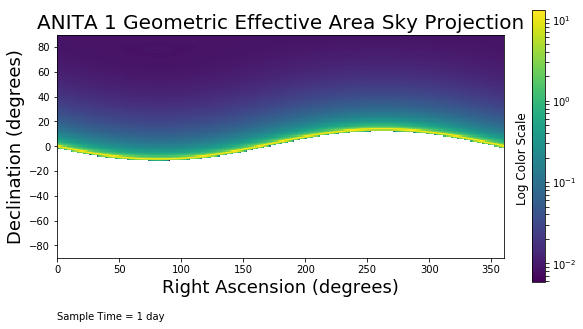

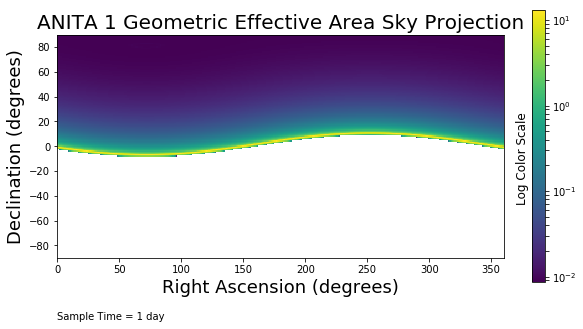

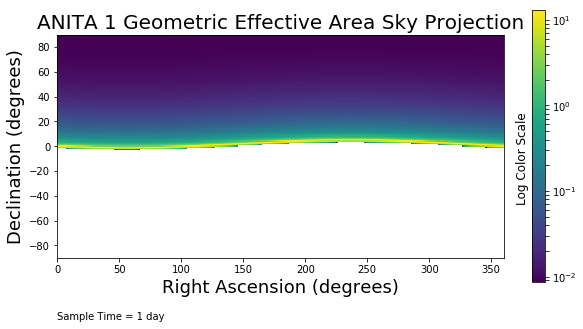

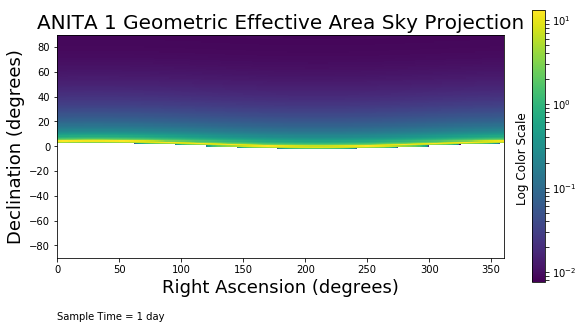

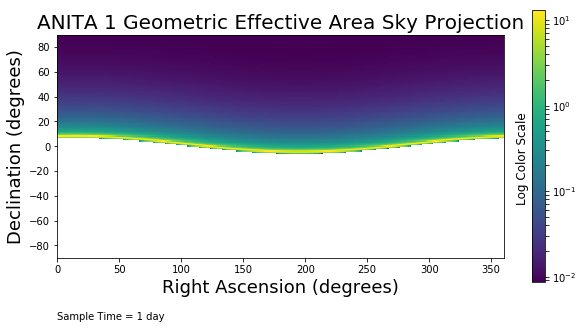

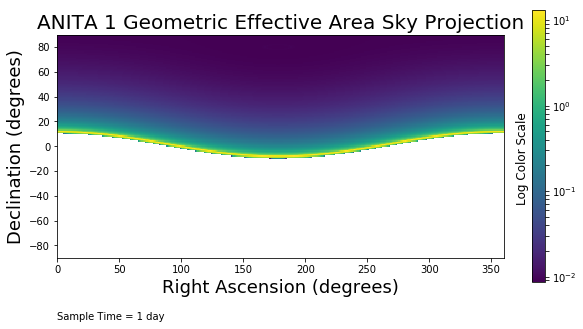

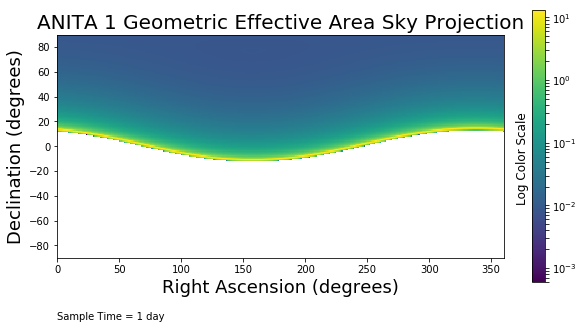

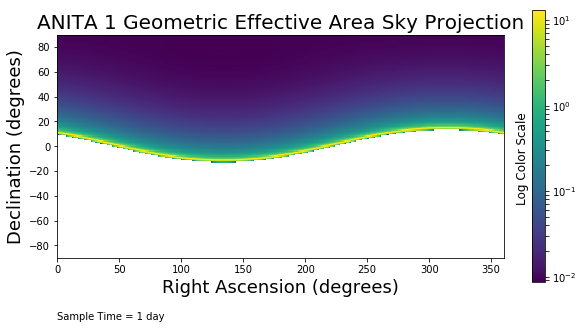

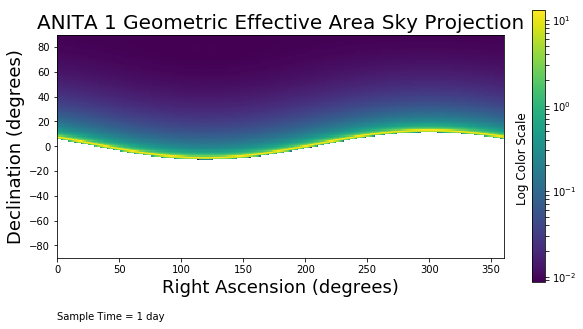

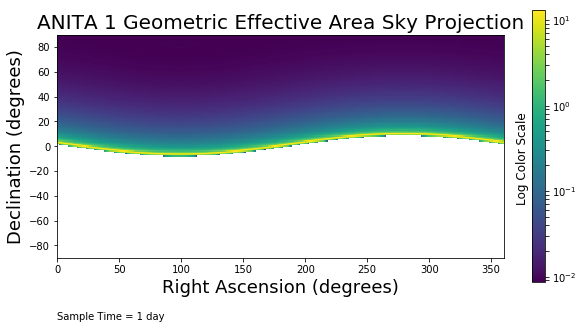

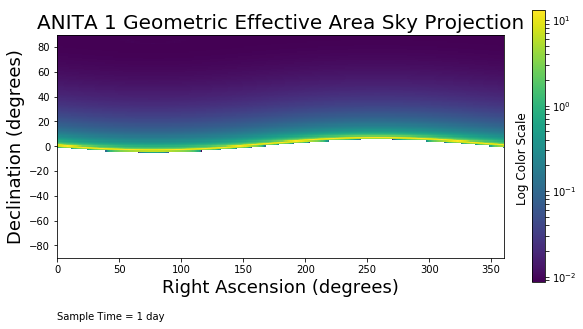

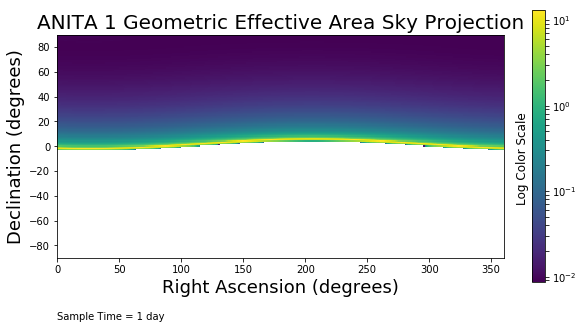

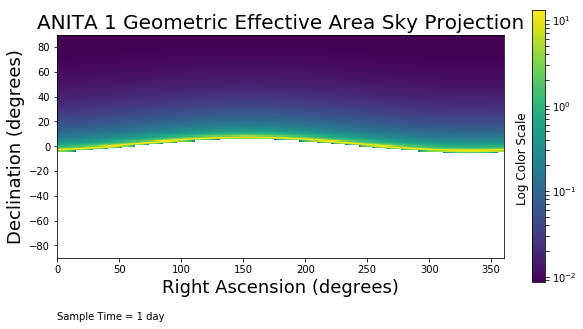

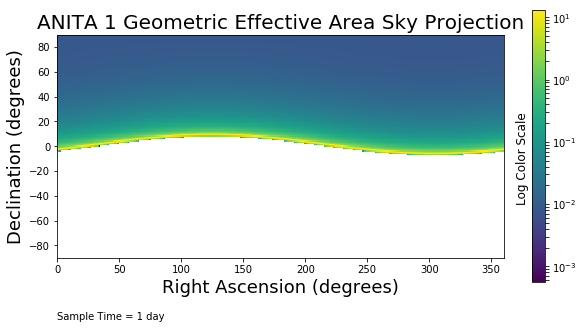

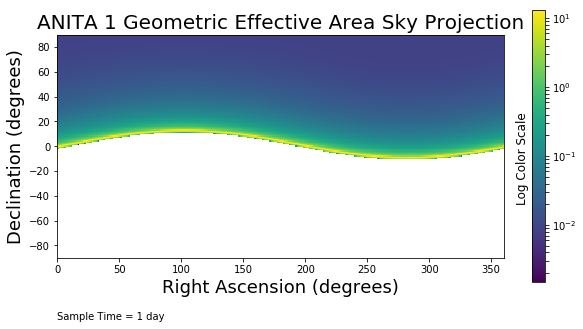

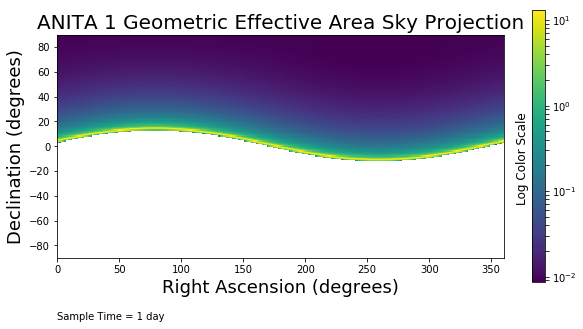

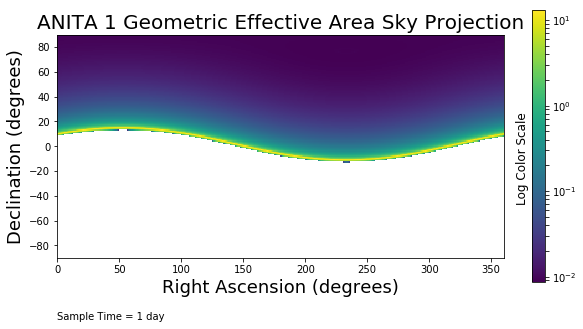

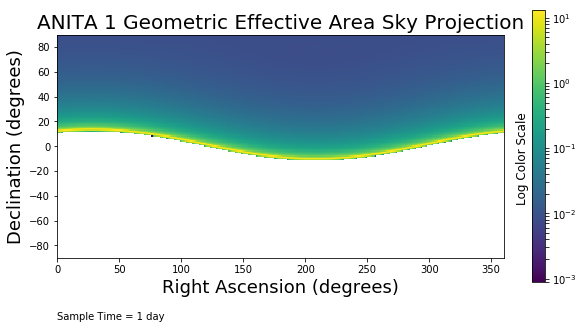

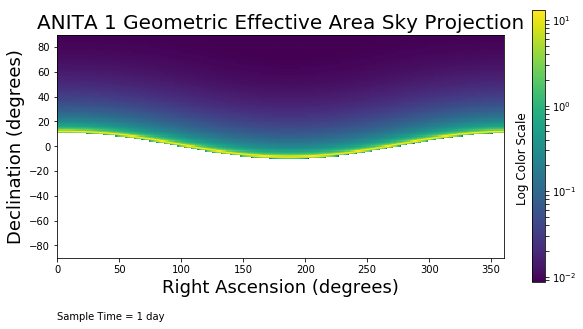

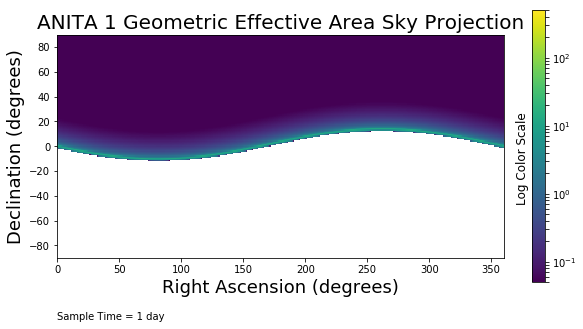

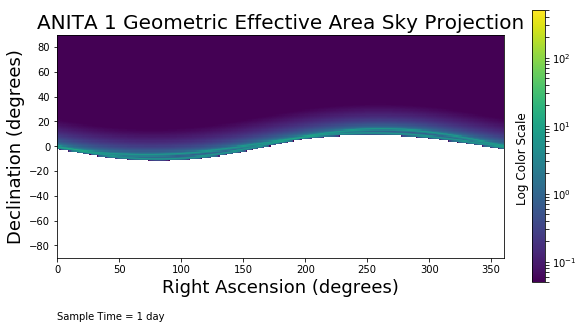

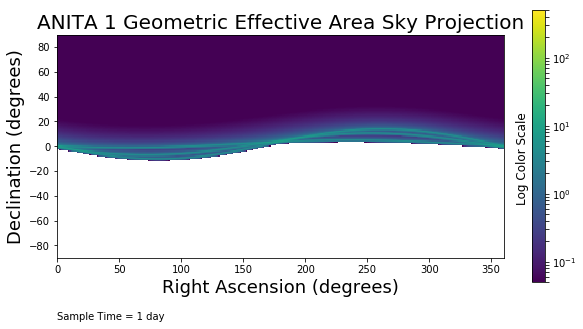

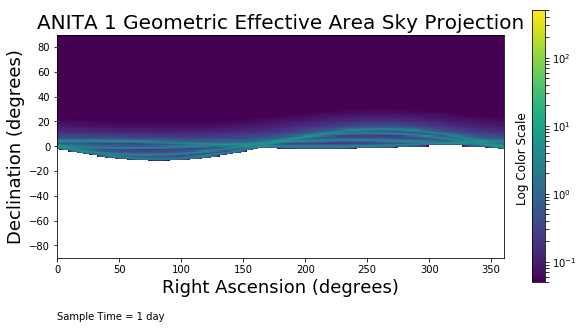

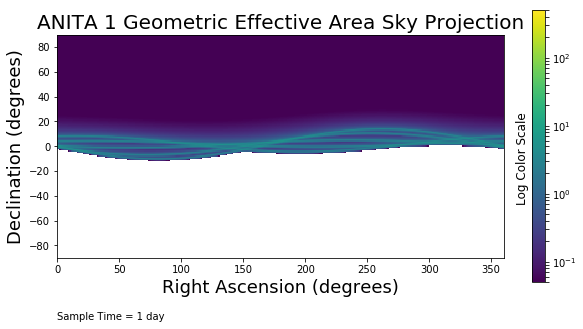

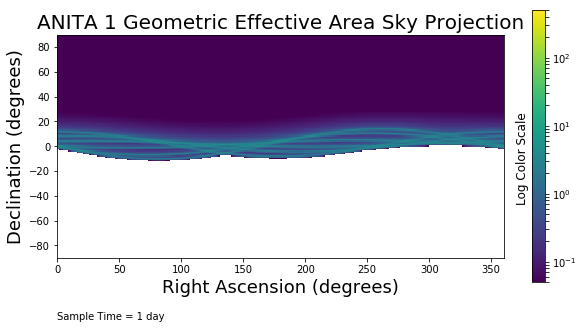

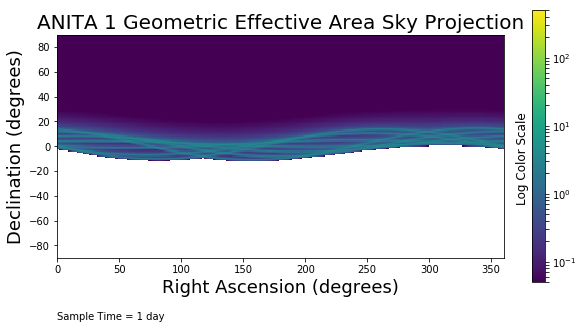

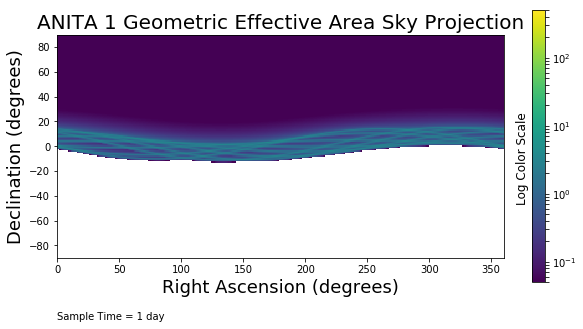

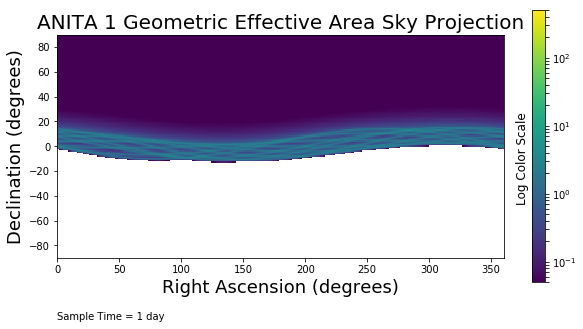

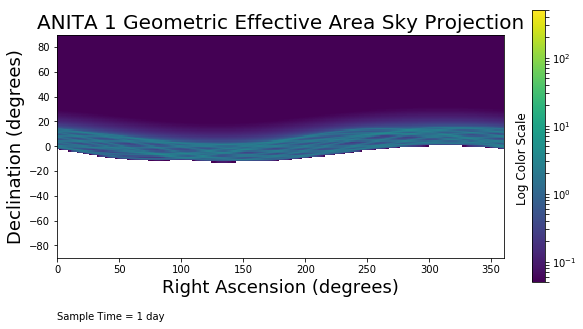

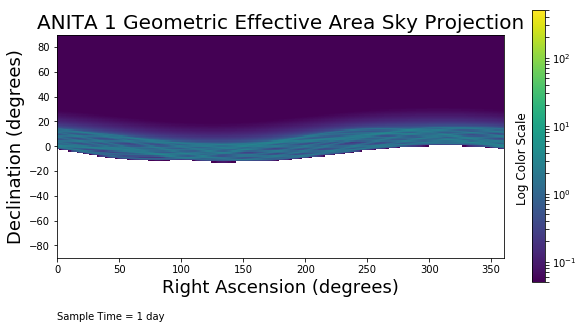

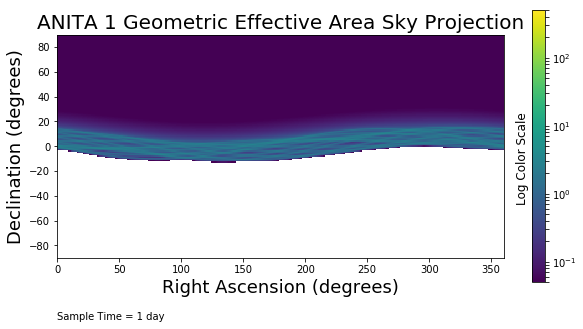

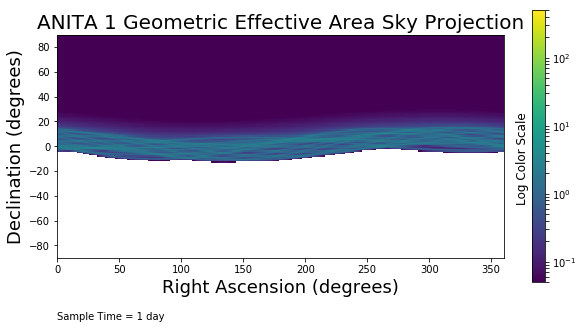

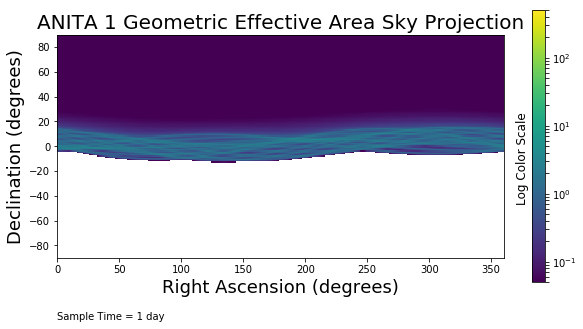

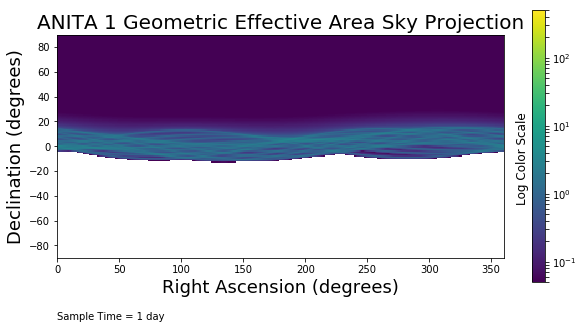

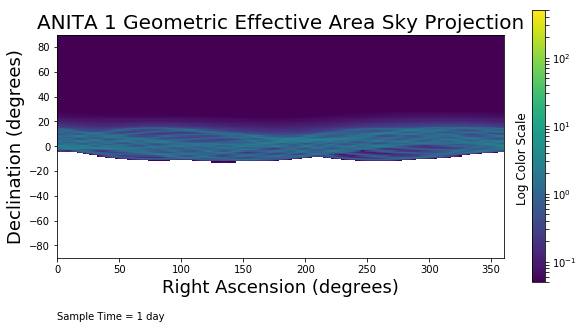

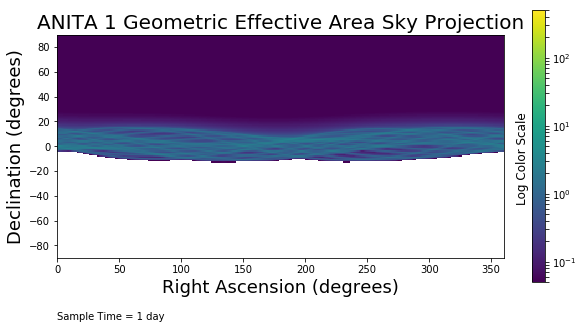

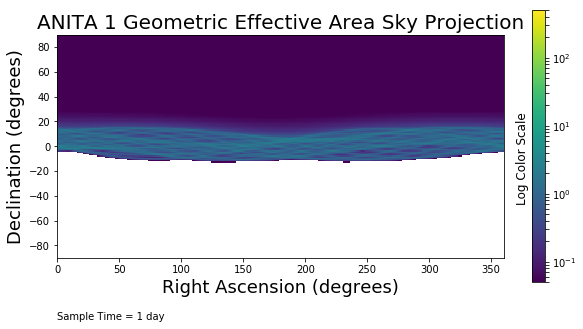

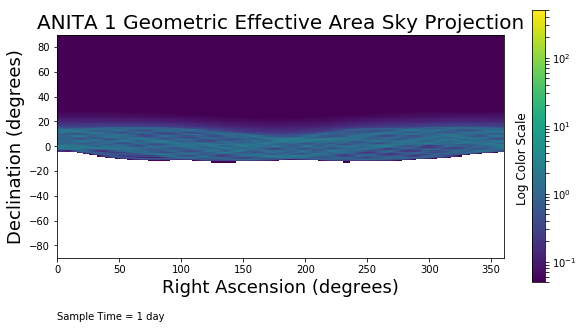

In [21]:
# Making Sky Map for each Time Sample
for k in range(0,N_sim):
    fig = plt.figure(figsize=(10,10))

    left = 0
    right = 360
    bottom = -90
    top = 90
    extent = [left, right, bottom, top]
    plt.imshow(np.flip(np.transpose(sky_maps_frames_sep[k]),0), extent = extent, norm=matplotlib.colors.LogNorm())
    plt.text(370,20,'Log Color Scale',rotation=90,fontsize=12)
    plt.colorbar(shrink=0.5)

    plt.ylabel("Declination (degrees)", fontsize=18)
    plt.xlabel("Right Ascension (degrees)", fontsize=18)
    plt.title("ANITA " +str(flight)+" Geometric Effective Area Sky Projection", fontsize=20)
    #plt.text(0, -140, "Sample Time = "+str(T_samp.value/60)+" min")
    plt.text(0, -140, "Sample Time = 1 day")
    filename = "animations/bin_sep"+str(k)+".png"
    plt.savefig(filename)
    #plt.show()
    
# Making Cumulative Sky Map
for k in range(0,N_sim):
    fig = plt.figure(figsize=(10,10))

    left = 0
    right = 360
    bottom = -90
    top = 90
    extent = [left, right, bottom, top]
    plt.imshow(np.flip(np.transpose(sky_maps_frames_total[k]),0), extent = extent, norm=matplotlib.colors.LogNorm())
    plt.text(370,20,'Log Color Scale',rotation=90,fontsize=12)
    plt.colorbar(shrink=0.5)
    plt.clim(0.05, 500);
    #plt.text(0, -140, "Sample Time = "+str(T_samp.value/60)+" min")
    plt.ylabel("Declination (degrees)", fontsize=18)
    plt.xlabel("Right Ascension (degrees)", fontsize=18)
    plt.title("ANITA " +str(flight)+" Geometric Effective Area Sky Projection", fontsize=20)
    plt.text(0, -140, "Sample Time = 1 day")
    filename = "animations/bin_tot"+str(k)+".png"
    plt.savefig(filename)
    #plt.show()



In [13]:
# Making Movie
import imageio
images = []
for k in range(0,N_sim):
    filename = "animations/bin_sep"+str(k)+".png"
    images.append(imageio.imread(filename))
imageio.mimsave('animations/ANITA_'+str(flight)+'_movie_sep_'+str(T_samp.value/60)+'.gif', images)

images = []
for k in range(0,N_sim):
    filename = "animations/bin_tot"+str(k)+".png"
    images.append(imageio.imread(filename))
imageio.mimsave('animations/ANITA_'+str(flight)+'_movie_tot_'+str(T_samp.value/60)+'.gif', images)

## Estimating Angular Change as a function of Time

In [ ]:
A_loc = EarthLocation(lat = -77 *u.deg,lon = 100 * u.deg, height = 37 *u.km )

# fig1 = plt.figure(figsize=(6,6))
# fig2 = plt.figure(figsize=(6,6))
# fig3 = plt.figure(figsize=(6,6))
# fig4 = plt.figure(figsize=(6,6))
# fig5 = plt.figure(figsize=(6,6))
fig6 = plt.figure(figsize=(6,6))

# ax1 = fig1.add_subplot(111)
# ax2 = fig2.add_subplot(111)
# ax3 = fig3.add_subplot(111)
# ax4 = fig4.add_subplot(111)
# ax5 = fig5.add_subplot(111)
ax6 = fig6.add_subplot(111)

N = 240
units = 1
if units == 1:
    T_samp = TimeDelta(int(round(3600/N)), format='sec')
    N_factor = N/60
    N_time = 60
    # ax1.set_xlabel("Minutes")
    # ax2.set_xlabel("Minutes")
    # ax3.set_xlabel("Minutes")
    # ax4.set_xlabel("Minutes")
    # ax5.set_xlabel("Minutes")
    ax6.set_xlabel("Minutes")

    # ax1.set_ylabel("Elevation Angle Change ("+u'\N{DEGREE SIGN}'+"/min)")
    # ax2.set_ylabel("Azimuth Change ("+u'\N{DEGREE SIGN}'+"/min)")
    # ax3.set_ylabel("Total Angular Position Change ("+u'\N{DEGREE SIGN}'+"/min)")
    # ax4.set_ylabel("Elevation Angle Derivative ("+u'\N{DEGREE SIGN}'+"/min)")
    # ax5.set_ylabel("Azimuth Change Derivative ("+u'\N{DEGREE SIGN}'+"/min)")
    ax6.set_ylabel("Effective Area ("+r'$km^2$'+")")
else: 
    T_samp = TimeDelta(int(round(86400/N)), format='sec')
    print T_samp
    N_factor = N/24
    N_time = 24
    # ax1.set_xlabel("Hours")
    # ax2.set_xlabel("Hours")
    # ax3.set_xlabel("Hours")
    # ax4.set_xlabel("Hours")
    # ax5.set_xlabel("Hours")
    ax6.set_xlabel("Hours")

    # ax1.set_ylabel("Elevation Angle Change ("+u'\N{DEGREE SIGN}'+"/hr)")
    # ax2.set_ylabel("Azimuth Change ("+u'\N{DEGREE SIGN}'+"/hr)")
    # ax3.set_ylabel("Total Angular Position Change ("+u'\N{DEGREE SIGN}'+"/hr)")
    # ax4.set_ylabel("Elevation Angle Derivative ("+u'\N{DEGREE SIGN}'+"/hr)")
    # ax5.set_ylabel("Azimuth Change Derivative ("+u'\N{DEGREE SIGN}'+"/hr)")
    ax6.set_ylabel("Effective Area ("+r'$km^2$'+")")


legend_list = []

for k in range(73,74):
    print k
    star_dec = k
    star_ra = 0
    star_alt = []
    star_az = []
    separations_dec =[0] 
    separations_ra =[0]
    separations =[0]
    areas = []
    
    star_locs = []  
    start_time = Time(flight_path_1[0][0],format="unix")
    star_loc = SkyCoord(ra =star_ra *u.deg, dec = star_dec *u.deg, frame = 'icrs', obstime = start_time, location = A_loc)
    star_locs.append(star_loc)
    star_alt_az = star_loc.transform_to('altaz')
    star_alt.append(star_alt_az.alt.value)
    star_az.append(star_alt_az.az.value)
    area =  np.interp(-star_alt_az.alt.value,np.linspace(0,89,90),eff_areas,0.0,0.0)
    MC_area = geom.Area(radians(-star_alt_az.alt.value),h[10],A_R[0].value,radians(1), 1000000)
    area_2 = MC_area.degree_eff_area()
    print star_dec, star_alt_az.alt.value,radians(-star_alt_az.alt.value),area, area_2
    areas.append(area_2)
    
    for i in range(1,N):
        new_time = Time(Time(flight_path_1[0][0],format="unix")+i*T_samp,format="unix")
        
        star_loc = SkyCoord(ra =star_ra *u.deg, dec = star_dec *u.deg, frame = 'icrs', obstime = new_time, location = A_loc)
        
        star_alt_az = star_loc.transform_to('altaz')
        star_alt.append(star_alt_az.alt.value)
        star_az.append(star_alt_az.az.value)

        obs_last= star_locs[i-1]
        obs_now= SkyCoord(az = star_alt_az.az.value * u.deg, alt = star_alt_az.alt.value * u.deg, frame='altaz', obstime = start_time, location = A_loc)
        star_locs.append(obs_now)
        
        sep = obs_now.separation(obs_last).to(u.deg)
        sep =sep.value
        separations.append(sep)
        separations_dec.append(star_alt[i] -  star_alt[i-1])
        separations_ra.append(star_az[i] -  star_az[i-1])
        
        area = np.interp(-star_alt_az.alt.value,np.linspace(0,89,90),eff_areas,0.0,0.0)
        MC_area = geom.Area(radians(-star_alt_az.alt.value),h[10],A_R[0].value,radians(1), 1000000)
        area_2 = MC_area.degree_eff_area()
        print star_dec, star_alt_az.alt.value,radians(-star_alt_az.alt.value),area, area_2
        areas.append(area_2)
        
    print np.asarray(np.linspace(0,N_time,N-1)).shape, np.asarray(areas[1:]-np.max(areas)/2).shape
    spline = interpolate.UnivariateSpline(np.asarray(np.linspace(0,N_time,N-1)), np.asarray(areas[1:]-np.max(areas)/2), s=2)
    #r1, r2 = spline.roots()
    #print r1,r2,r2-r1
    
    
    # Derivatives of the curves
    smooth_alt =  interpolate.UnivariateSpline(np.linspace(0,N_time,N-1),star_alt[1:],k=4)
    deriv_alt = smooth_alt.derivative()
    
    smooth_az =  interpolate.UnivariateSpline(np.linspace(0,N_time,N-1),np.unwrap(star_az[1:]),k=4)
    deriv_az = smooth_az.derivative()
    
    legend_list.append('RA: ' + str(star_ra)+u'\N{DEGREE SIGN}'+', Dec: ' + str(star_dec)+u'\N{DEGREE SIGN}')
#     ax1.plot(np.linspace(0,N_time,N-1),N_factor*np.asarray(separations_dec[1:]))
#     ax2.plot(np.linspace(0,N_time,N-1),N_factor*np.asarray(np.unwrap(radians(separations_ra[1:]))))
#     ax3.plot(np.linspace(0,N_time,N-1), N_factor*np.asarray(separations[1:]))
#     ax4.plot(np.linspace(0,N_time,N-1),N_factor*deriv_alt(np.linspace(0,N-1,N-1)))
#     ax5.plot(np.linspace(0,N_time,N-1),N_factor*deriv_az(np.linspace(0,N-1,N-1)))
    ax6.plot(np.linspace(0,N_time,N-1),areas[1:])
    ax6.plot(np.linspace(0,N_time,N-1),spline(np.linspace(0,N_time,N-1)))

ax6.axhline( y=0, color='k')

# legend = ax1.legend(legend_list, bbox_to_anchor=(1, 1))
# legend = ax2.legend(legend_list, bbox_to_anchor=(1, 1))
# legend = ax3.legend(legend_list, bbox_to_anchor=(1, 1))
# legend = ax4.legend(legend_list, bbox_to_anchor=(1, 1))
# legend = ax5.legend(legend_list, bbox_to_anchor=(1, 1))
legend = ax6.legend(legend_list, bbox_to_anchor=(1, 1))

# ax1.set_xlim([0, 24])
# ax2.set_xlim([0, 24])
# ax3.set_xlim([0, 24])
# ax4.set_xlim([0, 24])
# ax5.set_xlim([0, 24])
ax6.set_xlim([0, N_time])

# ax1.title.set_text("Change in Elevation Angle Over Time")
# ax2.title.set_text("Change in Azimuth Over Time")
# ax3.title.set_text("Angular Motion Over Time")
# ax4.title.set_text("Change in Elevation Angle Over Time")
# ax5.title.set_text("Change in Azimuth Over Time")
ax6.title.set_text("Change in Geometric Effective Area Over Time")

plt.show()

In [ ]:
r1,r2 =spline.roots()
print r2-r1

## Determining which parts of flight data to exclude

In [ ]:
from collections import Counter
d = Counter(flight_path_1[0])

result = max(d.iteritems(), key=lambda x: x[1])
print result

In [ ]:
# For flight I or IV 
diffs1 = [(flight_path_1[1][i]-flight_path_1[1][i-1])/flight_path_1[1][i-1]  for i in range(0,len(flight_path_1[1]))]
diffs2 = [(flight_path_1[2][i]-flight_path_1[2][i-1])/flight_path_1[2][i-1] for i in range(0,len(flight_path_1[2]))]
diffs3 = [(flight_path_1[3][i]-flight_path_1[3][i-1])/flight_path_1[3][i-1] for i in range(0,len(flight_path_1[3]))]

In [ ]:
# For flight III
diffs1 = [(flight_path_3[i+1][1]-flight_path_3[i][1])/flight_path_3[i][1] for i in range(0,len(flight_path_3[:])-1)]
diffs2 = [(flight_path_3[i+1][2]-flight_path_3[i][2])/flight_path_3[i][2] for i in range(0,len(flight_path_3[:])-1)]
diffs3 = [(flight_path_3[i+1][3]-flight_path_3[i][3])/flight_path_3[i][3] for i in range(0,len(flight_path_3[:])-1)]

In [ ]:
len(flight_path_3[:])

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

#plt.xlim(2,546245) 
#ax.plot(diffs2[0:28058])
#ax.plot(diffs2[28058:28960])
#ax.plot(diffs2[28960:])#28058-28958
ax.plot(diffs1)
plt.semilogy()

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

plt.xlim(0,546245) 
#ax.plot(diffs1[0:546245])
ax.plot(diffs2[0:546245])
#ax.plot(diffs3[0:546245])
legend = ax.legend(["Latitude","Longitude","Altitude"], fontsize=14, bbox_to_anchor=(1, 1.05))
plt.xlabel("Data Points in Interval", fontsize=18)
plt.ylabel("Difference from Previous Value (%)", fontsize=18)
plt.title("Interval 0 to 546245", fontsize=20)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()

plt.xlim(0,613775-546245) 
#ax.plot(diffs1[546245:613775])
ax.plot(diffs2[546245:613775])
#ax.plot(diffs3[546245:613775])
legend = ax.legend(["Latitude","Longitude","Altitude"], fontsize=14, bbox_to_anchor=(1, 1.05))
plt.xlabel("Data Points in Interval", fontsize=18)
plt.ylabel("Difference from Previous Value (%)", fontsize=18)
plt.title("Interval 546245 to 613775", fontsize=20)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()

plt.xlim(0,len(diffs1)-613775) 
#ax.plot(diffs1[613775:])
ax.plot(diffs2[613775:])
#ax.plot(diffs3[613775:])
legend = ax.legend(["Latitude","Longitude","Altitude"], fontsize=14, bbox_to_anchor=(1, 1.05))
plt.xlabel("Data Points in Interval", fontsize=18)
plt.ylabel("Difference from Previous Value (%)", fontsize=18)
plt.title("Interval 613775 to end", fontsize=20)



